In [1]:
import sys
sys.path.append('../src/')

from data_loader import DataLoader
from mnist import load_mnist
from model import Model
from multilayer_perceptron import MultilayerPerceptron as MLP, SGDTrainer
from random_fns import Normal, RandomFunction
from supervisor import StopReason, Supervisor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data, val_data, _ = load_mnist('../data/mnist.pkl.gz')

## Experiment #1

Calculating N=1
Calculating N=5
Calculating N=10
Calculating N=15
Calculating N=30
Calculating N=60
[(1, inf, 0.109), (5, inf, 0.688), (10, inf, 0.793), (15, 17, 0.802), (30, 6, 0.805), (60, 5, 0.808)]


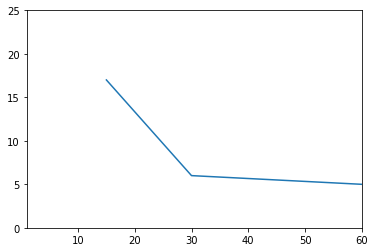

In [3]:
train_dataloader = DataLoader(train_data[:1000], batch_size=10)
val_dataloader = DataLoader(val_data[:1000])
random_fn = Normal(std=1)


def factory(N: int):
    def perform():
        print(f"Calculating N={N}")

        model = MLP(
            layer_sizes=[784, N, 10],
            random_fn=random_fn
        )
        trainer = SGDTrainer(
            learning_rate=0.01,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader
        )
        supervisor = Supervisor(
            model=model,
            trainer=trainer,
            max_epochs=100,
            epsilon=0.2,
            early_stopping_threshold=0.01
        )
        epochs, report, stop_reason = supervisor(silent=True)
        accuracy = report['val_accuracy']

        if stop_reason == StopReason.THRESHOLD_REACHED:
            return epochs, accuracy
        else:
            return np.inf, accuracy
        
    return perform


results = [(N, *factory(N)()) for N in [1, 5, 10, 15, 30, 60]]
print(results)

x, y_epochs, y_accuracy = zip(*results)
plt.plot(x, y_epochs)
plt.axis([1, 60, 0, 25])
plt.show()